In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/TDI_BLM_inj_B1.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading 1','Reading 2', 'Reading 3']
#Readings are in Grays per Second

In [3]:
max(data['Time Stamp'])

1540020830.894

In [4]:
print(data.head())

     Time Stamp     Reading 1     Reading 2     Reading 3
0  1.534476e+09  2.983000e-07  7.208000e-07  4.088000e-07
1  1.534476e+09  2.872000e-07  6.684000e-07  4.143000e-07
2  1.534476e+09  3.148000e-07  6.822000e-07  4.115000e-07
3  1.534476e+09  2.569000e-07  7.264000e-07  3.922000e-07
4  1.534476e+09  2.707000e-07  6.684000e-07  3.894000e-07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 4 columns):
Time Stamp    18978 non-null float64
Reading 1     18978 non-null float64
Reading 2     18978 non-null float64
Reading 3     18978 non-null float64
dtypes: float64(4)
memory usage: 593.1 KB


In [4]:
data['Sum'] = data['Reading 1'] + data['Reading 2'] + data['Reading 3']

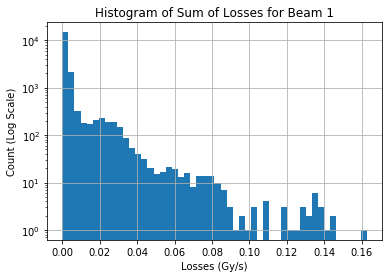

In [15]:
fig, ax = plt.subplots()
data['Sum'].hist(ax=ax, bins=50)
plt.title('Histogram of Sum of Losses for Beam 1')
plt.ylabel('Count (Log Scale)')
plt.xlabel('Losses (Gy/s)')
#ax.set_xlim(10e-3,10e-1)
ax.set_yscale('log')
plt.savefig('../Dissertation/images/Histogram_of_Sum_of_Beam_Losses')

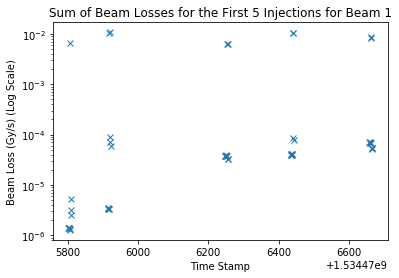

In [8]:
sample = data[:50]
plt.figure()
plt.plot(sample['Time Stamp'],sample['Sum'],'x')
plt.yscale('log')
plt.xlabel('Time Stamp')
plt.ylabel('Beam Loss (Gy/s) (Log Scale)')
plt.title('Sum of Beam Losses for the First 5 Injections for Beam 1')
plt.savefig('../Dissertation/images/Raw_Beam_Loss')
plt.show()
#As can be seen from this plot, every time theres
#an injection at a cetain point there is a spike in
#the reading of the BLM

In [9]:
print(sample.head(30))

      Time Stamp     Reading 1     Reading 2     Reading 3       Sum
0   1.534476e+09  2.983000e-07  7.208000e-07  4.088000e-07  0.000001
1   1.534476e+09  2.872000e-07  6.684000e-07  4.143000e-07  0.000001
2   1.534476e+09  3.148000e-07  6.822000e-07  4.115000e-07  0.000001
3   1.534476e+09  2.569000e-07  7.264000e-07  3.922000e-07  0.000001
4   1.534476e+09  2.707000e-07  6.684000e-07  3.894000e-07  0.000001
5   1.534476e+09  2.651000e-07  6.407000e-07  3.756000e-07  0.000001
6   1.534476e+09  2.389666e-03  4.122301e-03  4.235560e-05  0.006554
7   1.534476e+09  1.242800e-06  4.101300e-06  0.000000e+00  0.000005
8   1.534476e+09  8.286000e-07  2.366900e-06  0.000000e+00  0.000003
9   1.534476e+09  7.126000e-07  1.839400e-06  0.000000e+00  0.000003
10  1.534476e+09  5.855000e-07  2.549200e-06  4.198000e-07  0.000004
11  1.534476e+09  5.441000e-07  2.518800e-06  3.977000e-07  0.000003
12  1.534476e+09  5.524000e-07  2.435900e-06  3.894000e-07  0.000003
13  1.534476e+09  5.772000e-07  2.

In [10]:
def arrangeData(df):
    #This function will find the row with the maximum sum of each 10s
    #window and store the required data in a new dataframe
    columns = ['Time Stamp', 'Reading 1', 'Reading 2', 'Reading 3', 'Sum']
    resulting_df = pd.DataFrame(columns=columns)
    i = 0
    while i < len(df):
        temp_df = df[i:i+9]
        row = temp_df.loc[temp_df['Sum'].idxmax()]
        resulting_df = resulting_df.append(row,ignore_index=True)
        i = i + 10
    return resulting_df
            

In [11]:
BLM1_readings = arrangeData(data)
print(BLM1_readings.head(30))

      Time Stamp  Reading 1  Reading 2     Reading 3       Sum
0   1.534476e+09   0.002390   0.004122  4.235560e-05  0.006554
1   1.534476e+09   0.003960   0.006722  6.880570e-05  0.010751
2   1.534476e+09   0.002312   0.003985  4.077860e-05  0.006337
3   1.534476e+09   0.004158   0.006186  6.696360e-05  0.010411
4   1.534477e+09   0.003327   0.005163  5.489990e-05  0.008546
5   1.534477e+09   0.004684   0.006536  7.285460e-05  0.011293
6   1.534477e+09   0.004424   0.006804  7.277450e-05  0.011301
7   1.534477e+09   0.005972   0.008917  9.644900e-05  0.014986
8   1.534477e+09   0.002947   0.005454  5.410450e-05  0.008455
9   1.534477e+09   0.004115   0.006849  7.076660e-05  0.011035
10  1.534477e+09   0.004700   0.006856  7.501990e-05  0.011631
11  1.534478e+09   0.007818   0.015139  1.131305e-04  0.023071
12  1.534478e+09   0.009655   0.014631  1.568146e-04  0.024443
13  1.534478e+09   0.005338   0.006979  7.964320e-05  0.012397
14  1.534478e+09   0.010594   0.015716  1.702261e-04  0

In [12]:
#Repeat the above steps with the second BLM data
data = pd.read_csv('../Data/TDI_BLM_inj_B2.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading 1','Reading 2', 'Reading 3']
data['Sum'] = data['Reading 1'] + data['Reading 2'] + data['Reading 3']
BLM2_readings = arrangeData(data)
print(BLM2_readings.head(30))

      Time Stamp     Reading 1  Reading 2  Reading 3       Sum
0   1.534476e+09  4.164900e-06   0.002766   0.002754  0.005523
1   1.534476e+09  7.440400e-06   0.005080   0.003975  0.009062
2   1.534476e+09  4.153800e-06   0.002799   0.002634  0.005437
3   1.534476e+09  6.258300e-06   0.004334   0.004024  0.008364
4   1.534477e+09  5.891000e-06   0.004101   0.003732  0.007839
5   1.534477e+09  9.448300e-06   0.006555   0.005126  0.011690
6   1.534477e+09  4.650900e-06   0.003169   0.003107  0.006281
7   1.534477e+09  6.261100e-06   0.004191   0.003228  0.007426
8   1.534478e+09  1.998740e-05   0.013963   0.010962  0.024945
9   1.534478e+09  1.714830e-05   0.011978   0.009248  0.021243
10  1.534478e+09  2.025260e-05   0.014298   0.011265  0.025584
11  1.534478e+09  1.995150e-05   0.013951   0.009782  0.023754
12  1.534478e+09  2.573480e-05   0.018091   0.013613  0.031729
13  1.534478e+09  1.495260e-05   0.010712   0.008312  0.019039
14  1.534479e+09  1.942680e-05   0.013816   0.011125  0

**** Save the Non-normalised data

In [8]:
Non_Normalised = BLM1_readings.drop('Sum', axis=1)
Non_Normalised.to_pickle('../Data/Beam1_BLM_NN.pkl')
Non_Normalised = BLM2_readings.drop('Sum', axis=1)
Non_Normalised.to_pickle('../Data/Beam2_BLMNN.pkl')

***** Continue

In [13]:
#Normalize the columns so that all values lie between 0 and 1
#Also drop the sum column as we do not need it anymore
BLM1_readings['Reading 1'] = (BLM1_readings['Reading 1']-min(BLM1_readings['Reading 1']))/(max(BLM1_readings['Reading 1'])-min(BLM1_readings['Reading 1']))
BLM1_readings['Reading 2'] = (BLM1_readings['Reading 2']-min(BLM1_readings['Reading 2']))/(max(BLM1_readings['Reading 2'])-min(BLM1_readings['Reading 2']))
BLM1_readings['Reading 3'] = (BLM1_readings['Reading 3']-min(BLM1_readings['Reading 3']))/(max(BLM1_readings['Reading 3'])-min(BLM1_readings['Reading 3']))
BLM1_readings = BLM1_readings.drop('Sum',axis=1)
BLM1_readings.describe()

,Time Stamp,Reading 1,Reading 2,Reading 3
count,1.898000e+03,1898.000000,1898.000000,1898.000000
mean,1.537150e+09,0.117479,0.131212,0.109946
std,1.675666e+06,0.132458,0.127527,0.123250
min,1.534476e+09,0.000000,0.000000,0.000000
25%,1.535796e+09,0.011825,0.024877,0.003993
50%,1.536506e+09,0.094571,0.116093,0.089513
75%,1.538614e+09,0.156472,0.185786,0.147227
max,1.540021e+09,1.000000,1.000000,1.000000


In [14]:
#Same thing for Second Dataset
BLM2_readings['Reading 1'] = (BLM2_readings['Reading 1']-min(BLM2_readings['Reading 1']))/(max(BLM2_readings['Reading 1'])-min(BLM2_readings['Reading 1']))
BLM2_readings['Reading 2'] = (BLM2_readings['Reading 2']-min(BLM2_readings['Reading 2']))/(max(BLM2_readings['Reading 2'])-min(BLM2_readings['Reading 2']))
BLM2_readings['Reading 3'] = (BLM2_readings['Reading 3']-min(BLM2_readings['Reading 3']))/(max(BLM2_readings['Reading 3'])-min(BLM2_readings['Reading 3']))
BLM2_readings = BLM2_readings.drop('Sum',axis=1)
BLM2_readings.describe()

,Time Stamp,Reading 1,Reading 2,Reading 3
count,1.740000e+03,1740.000000,1740.000000,1740.000000
mean,1.537181e+09,0.102416,0.147498,0.138872
std,1.651122e+06,0.121974,0.152243,0.140234
min,1.534476e+09,0.000000,0.000000,0.000000
25%,1.535797e+09,0.033598,0.049366,0.048713
50%,1.536547e+09,0.078705,0.121931,0.117694
75%,1.538572e+09,0.115844,0.180036,0.175089
max,1.540021e+09,1.000000,1.000000,1.000000


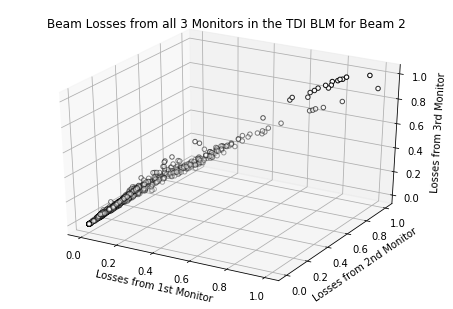

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(BLM2_readings['Reading 1'],BLM2_readings['Reading 2'],BLM2_readings['Reading 3'],c='white',
                edgecolor='k', s=20)
ax.set_title('Beam Losses from all 3 Monitors in the TDI BLM for Beam 2')
ax.set_xlabel('Losses from 1st Monitor')
ax.set_ylabel('Losses from 2nd Monitor')
ax.set_zlabel('Losses from 3rd Monitor')
plt.savefig('../Dissertation/images/BLM_3D_Plot', bbox_inches='tight')
plt.show()

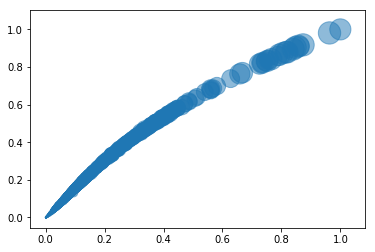

In [29]:
plt.figure()
plt.scatter(BLM2_readings['Reading 1'],BLM2_readings['Reading 2'],s=BLM2_readings['Reading 3']*500,alpha=0.5)
plt.show()

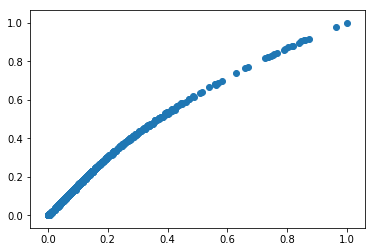

In [15]:
fig = plt.figure()
plt.scatter(BLM2_readings['Reading 1'],BLM2_readings['Reading 2'])
plt.show()

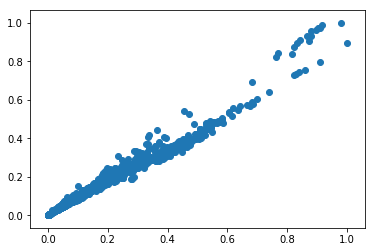

In [16]:
fig = plt.figure()
plt.scatter(BLM2_readings['Reading 2'],BLM2_readings['Reading 3'])
plt.show()

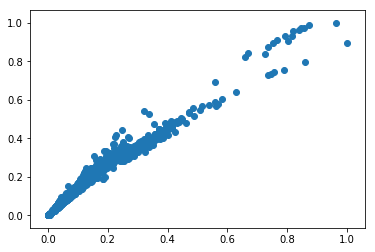

In [17]:
fig = plt.figure()
plt.scatter(BLM2_readings['Reading 1'],BLM2_readings['Reading 3'])
plt.show()

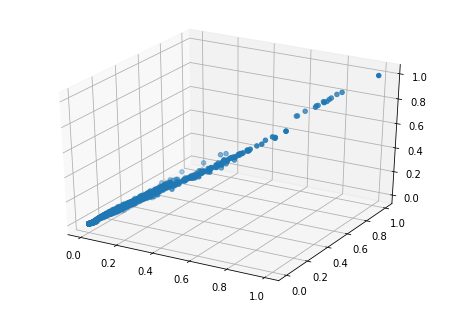

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(BLM1_readings['Reading 1'],BLM1_readings['Reading 2'],BLM1_readings['Reading 3'])
plt.show()

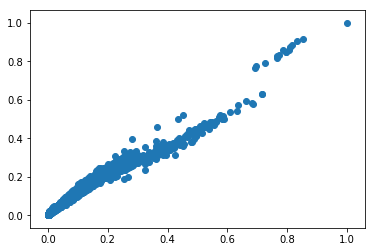

In [19]:
fig = plt.figure()
plt.scatter(BLM1_readings['Reading 1'],BLM1_readings['Reading 2'])
plt.show()

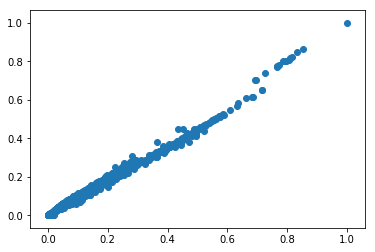

In [20]:
fig = plt.figure()
plt.scatter(BLM1_readings['Reading 1'],BLM1_readings['Reading 3'])
plt.show()

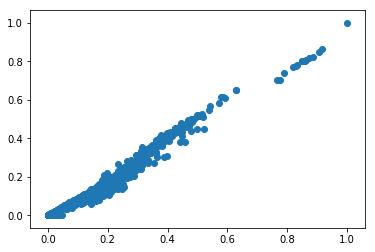

In [21]:
fig = plt.figure()
plt.scatter(BLM1_readings['Reading 2'],BLM1_readings['Reading 3'])
plt.show()

In [22]:
BLM1_readings.to_pickle('../Data/Beam1_BLM.pkl')
BLM2_readings.to_pickle('../Data/Beam2_BLM.pkl')

In [23]:
corr = BLM1_readings.drop('Time Stamp',axis=1).corr()
corr

,Reading 1,Reading 2,Reading 3
Reading 1,1.000000,0.982148,0.995896
Reading 2,0.982148,1.000000,0.988212
Reading 3,0.995896,0.988212,1.000000
